# Lake Stevens Roundabout Accident Analysis

Erin Mee

December 9, 2025

UW MSDS - DATA 512 Human Centered Data Science Project

---

## Environment Setup and Imports

An environment.yml file is included in this notebook's Github repository at https://github.com/erinmee/Lake-Stevens-Roundabout-Safety, see repository for more information.

### Python library imports:

In [2]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from datetime import datetime
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import mediapy as media

## Introduction

In the Lake Stevens area, where I live, two lane roundabouts were built and completed in 2023 and have been a point of contention since. The intersections they replaced were high traffic areas and the roundabouts were built as a way to relieve congestion as traffic got severely backed up at the lights. Accidents, though, have seemingly increased with the roundabouts in place. The roundabouts are littered with car parts and I have witnessed several close calls and accidents when driving through them. The increase in accidents is so notable that local news stations have reported on it [1] [2]. There is a figure that the news report mentions that accidents have increased but the amount of fatal or severe accidents have gone down with the roundabouts. Additionally, there is a study done in 2019 on roundabout safety in Washington state that found in many cases there is a period when the roundabout is first introduced where accidents are frequent but as drivers become more accustomed to it the accidents go down [3]. 

I am interested whether the severity of accidents have indeed gone down and whether over time drivers are getting better at navigating them. The roundabouts are a hot button topic in my area and I often wonder whether it is driver error or the roundabout’s design that drives the accidents. I am also interested in finding out whether people are in general avoiding the road more which could also be affecting the accident frequency. Washington state is a leader in implementing roundabouts, so understanding the safety and implications of new roundabouts is important so that future builds can avoid unsafe designs.


![Image of roundabouts](https://wsdot.wa.gov/sites/default/files/2024-01/SR9SR204Project-Photo-FinalRoundabouts_0.PNG)

## Research Questions

1. After the completion of the Lake Stevens roundabout did:
* Accident frequency significantly increase and
* Odds of accidents being severe go down
2. Over time, after the roundabout completion, has:
* Accident frequency followed a decreasing trend and
* Odds of accidents being severe also decrease over time


## Background and Related Work

The Insurance Institute for Highway Safety (IIHS) summarizes the current research into roundabout safety on their webpage [4]. Research on roundabouts have found some level of improvement in terms of accident reduction and reduction in accident severity, with roundabouts outside of the US having greater success likely due to roundabouts being overall more common [4]. There are outliers in some of these studies, though, where crash incidents were found to increase [5]. Many of these studies also only focus on single lane roundabouts. A recent study, though, focused on both single lane and double lane roundabouts specifically in Washington state built from 2009 to 2015 [3]. The study focused on long term trends in crash incidents and found that annual total crash counts declined by 8.8% each year in double lane roundabouts and that the odds of a crash being serious or deadly decreased by 32.1% annually [3]. 

King 5 news reported on the notable increase in accidents at the Lake Stevens roundabouts and cited figures from the Lake Stevens police department that there were 43 crashes near the intersection in 2022 and 162 in 2023 when the roundabouts were built, with 94 crashes in the first four months of 2024 [2]. No data was reported though on how the severity of the crashes has changed.

This study will determine if the long term trends of accidents at the Lake Stevens roundabouts also are declining in frequency and severity and will deliver a more in depth analysis of accidents that have occurred at the intersection. 


## Datasets Used

### Washington State Patrol Collision Analysis Tool

The main dataset used in this project comes from the [Washington State Patrol Collision Analysis Tool](https://fortress.wa.gov/wsp/collisionanalysistool/). The tool is queriable for accidents in specific locations and contains attributes on crash severity, vechicle damage and contributing circumstances.

**License**: Anonymized accident data is made available to the public through the Public Records Act found in Chapter 42.56 of the Revised Code of Washington State.

*Ethical Considerations*: Even with anonymized data individuals could be identified based on accident circumstances which could infringe on personal privacy. There may also, to a lesser extent, be an issue with informed consent since drivers may be unable to opt out of the collection of their data.

See `data_retrieval.ipynb` for further details on how the dataset was pulled together. Since the Collision Analysis Tool is only a web form with no API and locations are recorded with various namings i.e. *'hwy 9'*, *'SR 9'*, etc. by officers, a variety of naming schemas were queried for the intersections of interest and querying was automated for reproduciblity. The output dataset is available at the [Lake-Stevens-Roundabout-Safety](https://github.com/erinmee/Lake-Stevens-Roundabout-Safety) Github repository.

## Exploratory Data Analysis & Dataset Formatting

First, load raw data output from `data_retrieval.ipynb`

In [7]:
raw_coll_data = pl.read_csv("data/collision_data/collision_data_*.csv")
raw_coll_data

Colli_Rpt_Num_Colli_Rpt_Num,Colli_Rpt_Num_Colli_Surr_Key,Colli_Rpt_Num_Trans_Date_Time,Colli_Rpt_Num_Colli_Rpt_Typ_Surr_Key,Colli_Rpt_Num_Colli_Entry_Date_Time,Colli_Rpt_Num_QA_Typ_Cd,Colli_Rpt_Num_QA_Date_Time,Colli_Rpt_Num_Colli_Rpt_Src_Typ_Cd,Location_Id,Location_Colli_Rpt_Num,Location_Pri_Trfcway,Location_Distn_From_Ref_Pt,Location_Ref_Pt_Miles_Feet_Ind,Location_Cmps_Dirn_Typ_Cd,Location_Secondary_Trfcway,Location_Block_Num,Location_MilePost,Location_Ref_Pt_Block_MilePost_Ind,Location_Colli_Rpt_Typ_Surr_Key,Colli_Dtl_Info_Colli_Surr_Key,Colli_Dtl_Info_Rec_Stat_Typ,Colli_Dtl_Info_Colli_Date,Colli_Dtl_Info_Fire_Ind,Colli_Dtl_Info_Stol_Vehcl_Ind,Colli_Dtl_Info_Cty_Surr_Key,Colli_Dtl_Info_Cnty_Surr_Key,Colli_Dtl_Info_Hit_Run_Ind,Colli_Dtl_Info_Rdwy_Surfc_Cond_Typ_Cd,Colli_Dtl_Info_St_Rpt_Ind,Colli_Dtl_Info_Non_Trfc_Ind,Colli_Dtl_Info_Intnl_Ind,Colli_Dtl_Info_Med_Caused_Ind,Colli_Dtl_Info_Fed_Func_Cls_Surr_Key,Colli_Dtl_Info_Jct_Relat_Typ_Cd,Colli_Dtl_Info_Loc_Char_Typ_Cd,Colli_Dtl_Info_Rdwy_Char_Typ_Cd,Colli_Dtl_Info_Wea_Typ_Cd,…,Pedcyc_Unit_Num,Pedcyc_Pedcyc_Typ_Cd,Pedcyc_Ped_Pedcyc_Loc_Typ_Cd,Pedcyc_Pedcyc_Actn_Typ_Cd,Pedcyc_Seq_Event_Typ_Cd_1,Pedcyc_Seq_Event_Typ_Cd_2,Pedcyc_Seq_Event_Typ_Cd_3,Pedcyc_Seq_Event_Typ_Cd_4,Pedcyc_Drvr_Colli_Surr_Key,Pedcyc_Drvr_Unit_Num,Pedcyc_Drvr_Gender_Typ_Cd,Pedcyc_Drvr_Age,Pedcyc_Drvr_Ped_Pedcyc_Cloth_Vis_Typ_Cd,Pedcyc_Drvr_Ctrb_Circums_Typ_Cd_1,Pedcyc_Drvr_Ctrb_Circums_Typ_Cd_2,Pedcyc_Drvr_Ctrb_Circums_Typ_Cd_3,Pedcyc_Drvr_Helmet_Use_Cd,Pedcyc_Drvr_Injur_Typ_Cd,Pedcyc_Drvr_Sobr_Typ_Cd,Pedcyc_Drvr_Alch_Test_Cd,Pedcyc_Drvr_Alch_Test_Result,Pedcyc_Drvr_Drug_Recogn_Cls_Cd_1,Pedcyc_Drvr_Drug_Recogn_Cls_Cd_2,Pedcyc_Drvr_CitationCharge,Pedcyc_Drvr_DeathAfter30DaysFlag,Pedcyc_Drvr_MedicalTransportedFlag,Pedcyc_Drvr_UnitImpairmentId,Pedcyc_Drvr_AlcoholResultId,Pedcyc_Drvr_DrugRecognitionExpertRequestId,Pedcyc_Pasngr_Colli_Surr_Key,Pedcyc_Pasngr_Unit_Num,Pedcyc_Pasngr_Age,Pedcyc_Pasngr_Gender_Typ_Cd,Pedcyc_Pasngr_Helmet_Use_Cd,Pedcyc_Pasngr_Injur_Typ_Cd,Pedcyc_Pasngr_Seat_Pos_Typ_Cd,Pedcyc_Pasngr_DeathAfter30DaysFlag
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""E445866""","""1878642""","""7/25/2015 4:29:32 PM""","""1""","""7/25/2015 4:29:31 PM""","""4""","""""","""1""","""218765""","""E445866""","""SR 9 ""","""""","""""","""""","""SR 204 ""","""700 ""","""""","""B""","""1""","""1878642""","""1""","""7/24/2015 12:10:00 PM""","""False""","""False""","""119""","""31""","""False""","""5""","""""","""""","""""","""""","""""","""""","""""","""5""","""2""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""E445866""","""1878642""","""7/25/2015 4:29:32 PM""","""1""","""7/25/2015 4:29:31 PM""","""4""","""""","""1""","""218765""","""E445866""","""SR 9 ""","""""","""""","""""","""SR 204 ""","""700 ""","""""","""B""","""1""","""1878642""","""1""","""7/24/2015 12:10:00 PM""","""False""","""False""","""119""","""31""","""False""","""5""","""""","""""","""""","""""","""""","""""","""""","""5""","""2""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""E446101""","""1878877""","""12/1/2020 4:58:47 PM""","""1""","""7/26/2015 5:12:00 PM""","""""","""""","""1""","""1487887""","""E446101""","""SR9 ""","""""","""""","""""","""SR 204 ""","""""","""""","""""","""""","""1878877""","""""","""7/25/2015 11:05:00 PM""","""False""","""False""","""119""","""

Since the raw output data contains repeat entries from the different location namings queried, filter dataset for only unqiue entries

In [8]:
coll_data = raw_coll_data.unique()
len(coll_data)

1096

### Key Dataset Attributes

The dataset contains many attributes, for more information on each attribute see [CAT-DataDictionary.xlsx](./data/CAT-DataDictionary.xlsx) for column definitions and [collision_analysis_tool_lookup_tables.xlsx](./data/collision_analysis_tool_lookup_tables.xlsx) for categorical variable definitions. Both resources were taken from the Collision Analysis Tool [website](https://collisionanalysistool.wsp.wa.gov/Help/Help).

For this analysis, the following attributes are of interest:
| Attribute | Description | 
| --- | --- |
| Colli_Rpt_Num_Colli_Surr_Key | Primary key unique for each collision report |
| Colli_Dtl_Info_Colli_Date | The date/time of the crash |
| Colli_Unit_Damage_Threshold_Met_Ind | An indicator to determine if the vehicle damaged during the crash resulted in at least $700 of damage |
| MV_Drvr_Injur_Typ_Cd | A code that relates to a description of type of bodily damage or harm which a motor vehicle driver incurred in a crash |
| MV_Pasngr_Injur_Typ_Cd |  A code that relates to a description of type of bodily damage or harm which a motor vehicle passenger incurred in a crash |

For the driver and passenger injury code, the following descriptions exist:

| Most_Sev_Inj_Typ_Cd |	Description |
| --- | --- |
| 0 | Unknown |
| 1 | No Injury |
| 2 | Dead at Scene |
| 3 | Dead on Arrival |
| 4 | Died in Hospital |
| 5 | Serious Injury |
| 6 | Evident Injury |
| 7 | Possible Injury |


### Analytical Dataset Preparation

The following code transforms the data for analysis by:
* Casting Collision Date as datetime
* Casting Collision Damage Theshold Met as Boolean
* Selects passenger and driver injury codes for injury and severe injury present
* Groups by collision report primary key since multiple entries of the same collision are present if multiple people are involved

In [19]:

coll_per_crash = (
    coll_data
    .with_columns([
        pl.col("Colli_Dtl_Info_Colli_Date").str.to_datetime(format="%m/%d/%Y %I:%M:%S %p"),
        pl.col("Colli_Unit_Damage_Threshold_Met_Ind").replace_strict({"False": 0, "True": 1, "" : None}).cast(pl.Int32, strict=False),
        pl.col("MV_Drvr_Injur_Typ_Cd").replace_strict(  {'0' : None, '1' : 0, '2' : 1, '3' : 1, '4' : 1, '5' : 1, '6' : 1, '7' : 1, '' : None}).alias("Driver_Injury").cast(pl.Int32, strict=False),
        pl.col("MV_Pasngr_Injur_Typ_Cd").replace_strict({'0' : None, '1' : 0, '2' : 1, '3' : 1, '4' : 1, '5' : 1, '6' : 1, '7' : 1, '' : None}).alias("Passenger_Injury").cast(pl.Int32, strict=False),
        pl.col("MV_Drvr_Injur_Typ_Cd").replace_strict(  {'0' : None, '1' : 0, '2' : 1, '3' : 1, '4' : 1, '5' : 1, '6' : 0, '7' : 0, '' : None}).alias("Severe_Driver_Injury").cast(pl.Int32, strict=False),
        pl.col("MV_Pasngr_Injur_Typ_Cd").replace_strict({'0' : None, '1' : 0, '2' : 1, '3' : 1, '4' : 1, '5' : 1, '6' : 0, '7' : 0, '' : None}).alias("Severe_Passenger_Injury").cast(pl.Int32, strict=False),
        ])
    .with_columns([
        pl.when(pl.col("Driver_Injury").is_null() & pl.col("Passenger_Injury").is_null()).then(None)
            .when((pl.col("Driver_Injury") == 1) | (pl.col("Passenger_Injury") == 1)).then(1)
            .otherwise(0)
            .alias("Any_Injury")
    ])
    .with_columns([
        pl.when(pl.col("Severe_Driver_Injury").is_null() & pl.col("Severe_Passenger_Injury").is_null()).then(None)
            .when((pl.col("Severe_Driver_Injury") == 1) | (pl.col("Severe_Passenger_Injury") == 1)).then(1)
            .otherwise(0)
            .alias("Any_Severe_Injury")
    ])
    .group_by("Colli_Rpt_Num_Colli_Surr_Key")
    .agg([
        pl.first("Colli_Dtl_Info_Colli_Date").alias("Collision_Date"),
        pl.max("Colli_Unit_Damage_Threshold_Met_Ind").alias("Any_Damage"),
        pl.max("Any_Injury").alias("Any_Injury"),
        pl.max("Any_Severe_Injury").alias("Any_Severe_Injury"),
        pl.max("Driver_Injury").alias("Driver_Injury"),
        pl.max("Passenger_Injury").alias("Passenger_Injury"),
        pl.max("Severe_Driver_Injury").alias("Severe_Driver_Injury"),
        pl.max("Severe_Passenger_Injury").alias("Severe_Passenger_Injury"),
    ])
    .with_columns([
        (pl.col("Any_Injury") + pl.col("Any_Severe_Injury")).alias("Injury_Flag")
    ])
)
coll_per_crash  

Colli_Rpt_Num_Colli_Surr_Key,Collision_Date,Any_Damage,Any_Injury,Any_Severe_Injury,Driver_Injury,Passenger_Injury,Severe_Driver_Injury,Severe_Passenger_Injury,Injury_Flag
str,datetime[μs],i32,i32,i32,i32,i32,i32,i32,i32
"""2686755""",2021-11-26 17:16:00,1,1,0,1,null,0,null,1
"""3093163""",2025-05-05 18:53:00,1,0,0,0,0,0,0,0
"""2896216""",2023-09-12 17:05:00,1,0,0,0,null,0,null,0
"""3085959""",2025-04-09 17:07:00,1,0,0,0,0,0,0,0
"""2964691""",2024-03-30 11:20:00,1,0,0,0,null,0,null,0
…,…,…,…,…,…,…,…,…,…
"""2949166""",2024-01-17 15:20:00,1,0,0,0,null,0,null,0
"""2909466""",2023-10-27 18:41:00,1,0,0,0,null,0,null,0
"""2873108""",2023-06-29 13:26:00,1,0,0,0,0,0,0,0


Additional dataframe generated of aggregated injury and crash counts by month

In [20]:
coll_per_crash = coll_per_crash.sort("Collision_Date")
monthly_counts = (
    coll_per_crash
    .group_by_dynamic("Collision_Date", every="1mo")
        .agg([pl.col("Any_Injury").sum().alias("Injury_Count_per_Month"), 
              pl.len().alias("Total_Crashes_per_Month"),
              pl.col("Any_Damage").sum().alias("Total_Damage_Threshold_Met_per_Month")])
    )

monthly_counts

Collision_Date,Injury_Count_per_Month,Total_Crashes_per_Month,Total_Damage_Threshold_Met_per_Month
datetime[μs],i32,u32,i32
2015-06-01 00:00:00,2,3,3
2015-07-01 00:00:00,1,4,2
2015-08-01 00:00:00,1,3,2
2015-09-01 00:00:00,0,1,1
2015-10-01 00:00:00,1,1,1
…,…,…,…
2025-07-01 00:00:00,0,9,8
2025-08-01 00:00:00,1,7,7
2025-09-01 00:00:00,2,13,13


In [ ]:
quarterly_counts = (
    coll_per_crash
    .group_by_dynamic("Collision_Date", every="1q")
        .agg([pl.col("Any_Injury").sum().alias("Injury_Count_per_quarter"), 
              pl.len().alias("Total_Crashes_per_quarter"),
              pl.col("Any_Damage").sum().alias("Total_Damage_Threshold_Met_per_quarter")])
    .filter(pl.col("Collision_Date") < datetime(2025,10,1)) # Exclude incomplete quarter
    )

quarterly_counts

Collision_Date,Injury_Count_per_quarter,Total_Crashes_per_quarter,Total_Damage_Threshold_Met_per_quarter
datetime[μs],i32,u32,i32
2015-04-01 00:00:00,2,3,3
2015-07-01 00:00:00,2,8,5
2015-10-01 00:00:00,1,2,2
2016-01-01 00:00:00,4,5,3
2016-04-01 00:00:00,1,4,3
…,…,…,…
2024-07-01 00:00:00,8,32,31
2024-10-01 00:00:00,7,38,37
2025-01-01 00:00:00,2,20,18


### Plot Crash Frequency per Month from 2015 to Current

Just from the graph, a dramatic increase in accidents is noticable right after the roundabouts completion on July 7, 2023. Initially, it was hypothesized that Covid years could have artifically decreased the rate of accidents just prior to the roundabout installation, inflating the effect, but there is still a stark difference even comparing accident rates in 2015-2016. There also appears to be a downward trend in accidents in the couple of years following the roundabout completion.

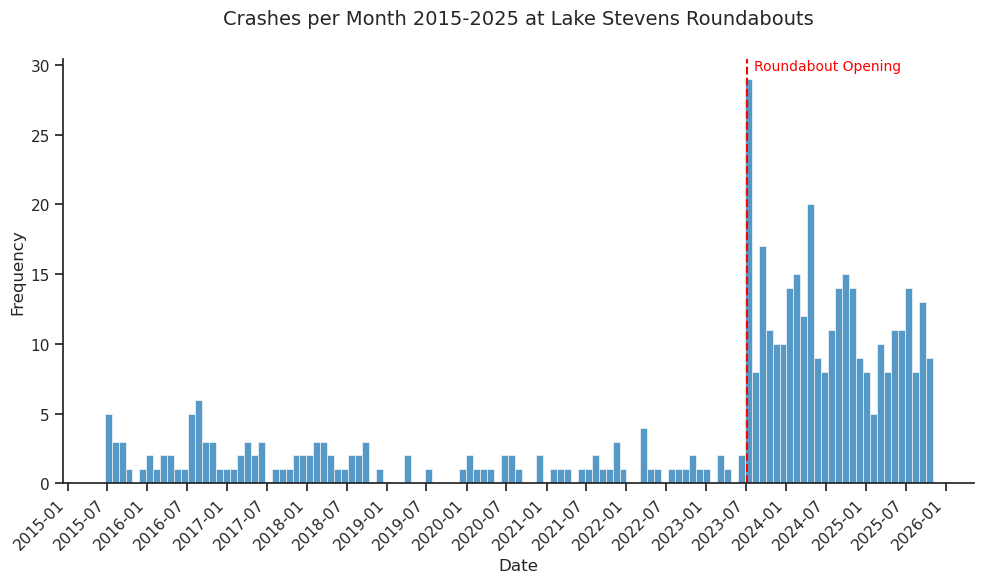

In [14]:
colors = sns.color_palette("tab10")

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.histplot(data=coll_per_crash, x=coll_per_crash["Collision_Date"], bins=119, kde=False, ax=ax, color=colors[0])
ax.axvline(datetime(2023,7,7), color='red', linestyle='--', label='Roundabout Opening')
ax.text(datetime(2023,7,7) + pd.Timedelta(days=30), ax.get_ylim()[1], 'Roundabout Opening', color='red', va='top', ha='left', fontsize=10)
ax.xaxis.set_major_locator(md.MonthLocator(interval=6)) # Major ticks every month
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m')) # Format as Year-Month
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_title('Crashes per Month 2015-2025 at Lake Stevens Roundabouts', fontsize=14, pad=25)
#plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

### Plot Crash Frequency with Proportion of Crashes with Injuries and Severe Injuries

Luckily, only one severe injury type was ever reported for the timespan of this dataset. This could be due to under-reporting from officers where they chose to only describe an 'evident' injury and not severity of the injury.

With the pre-roundabout accident rate so low, the true monthly probability of being in an accident involving an injury is not possible to determine.

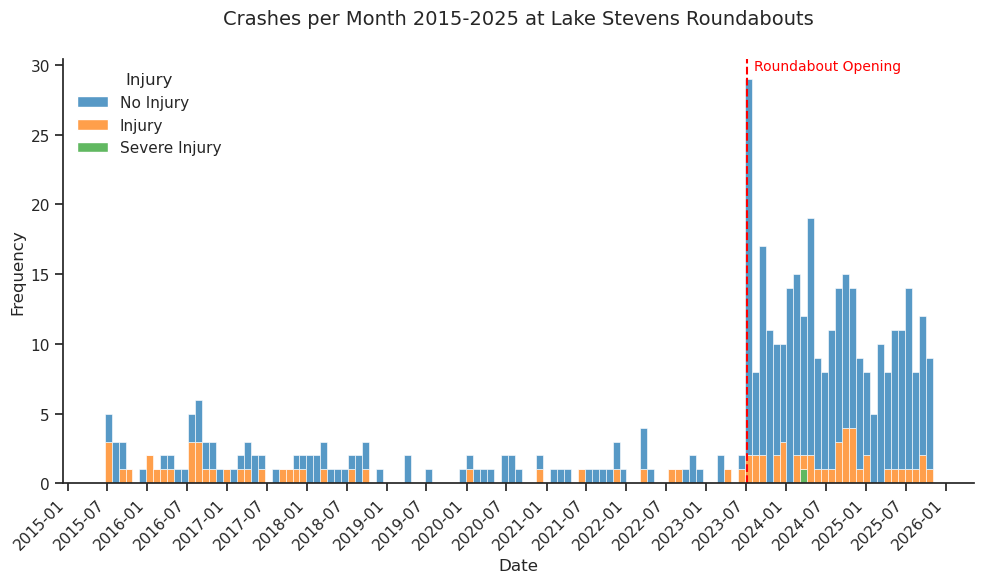

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.histplot(data=coll_per_crash, x=coll_per_crash["Collision_Date"], hue=coll_per_crash["Injury_Flag"], multiple="stack", bins=119, kde=False, ax=ax, palette='tab10')
ax.axvline(datetime(2023,7,7), color='red', linestyle='--')
ax.text(datetime(2023,7,7) + pd.Timedelta(days=30), ax.get_ylim()[1], 'Roundabout Opening', color='red', va='top', ha='left', fontsize=10)
ax.xaxis.set_major_locator(md.MonthLocator(interval=6)) # Major ticks every month
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m')) # Format as Year-Month
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right') # Rotate labels for readability
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_title('Crashes per Month 2015-2025 at Lake Stevens Roundabouts', fontsize=14, pad=25)
legend = ax.get_legend()
legend.set_title("Injury")
legend.get_texts()[0].set_text("No Injury")
legend.get_texts()[1].set_text("Injury")
legend.get_texts()[2].set_text("Severe Injury")
legend.set_frame_on(False)
plt.tight_layout()
plt.show()

#### Crash Frequency and Crash Proportion involving Injury by Quarter

Quarterly aggregation gives a slightly better view of the proportion of accidents with injuries before the roundabout.

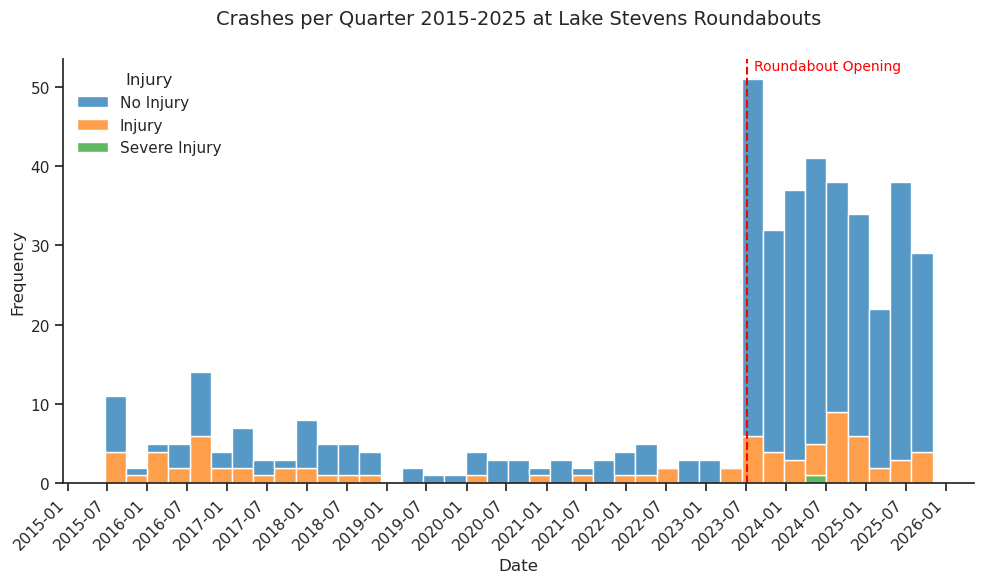

In [22]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.histplot(data=coll_per_crash, x=coll_per_crash["Collision_Date"], hue=coll_per_crash["Injury_Flag"], multiple="stack", bins=39, kde=False, ax=ax, palette='tab10')
ax.axvline(datetime(2023,7,7), color='red', linestyle='--')
ax.text(datetime(2023,7,7) + pd.Timedelta(days=30), ax.get_ylim()[1], 'Roundabout Opening', color='red', va='top', ha='left', fontsize=10)
ax.xaxis.set_major_locator(md.MonthLocator(interval=6)) # Major ticks every month
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m')) # Format as Year-Month
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right') # Rotate labels for readability
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_title('Crashes per Quarter 2015-2025 at Lake Stevens Roundabouts', fontsize=14, pad=25)
legend = ax.get_legend()
legend.set_title("Injury")
legend.get_texts()[0].set_text("No Injury")
legend.get_texts()[1].set_text("Injury")
legend.get_texts()[2].set_text("Severe Injury")
legend.set_frame_on(False)
plt.tight_layout()
plt.show()

### Proportion of Accidents with Injuries by Quarter

Only looking at the proportion, irregardless of the crash frequency, we can visualize how the data represents probability of injury over time. It is difficult to determine if there is indeed a trend in probability of injury following the roundabouts or a sudden change in probability with the roundabouts.

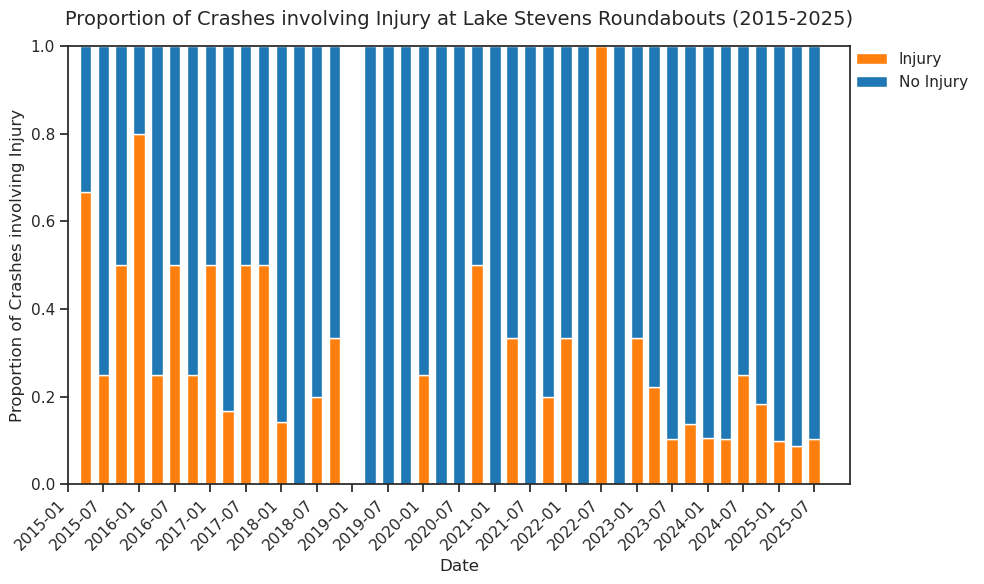

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(quarterly_counts["Collision_Date"], quarterly_counts["Injury_Count_per_quarter"] / quarterly_counts["Total_Crashes_per_quarter"], width=60, color=colors[1], label='Injury')
ax.bar(quarterly_counts["Collision_Date"],( 1 - quarterly_counts["Injury_Count_per_quarter"] / quarterly_counts["Total_Crashes_per_quarter"]), bottom = quarterly_counts["Injury_Count_per_quarter"] / quarterly_counts["Total_Crashes_per_quarter"], width=60, color=colors[0], label='No Injury')
ax.xaxis.set_major_locator(md.MonthLocator(interval=6)) # Major ticks every month
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m')) # Format as Year-Month
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right') # Rotate labels for readability
ax.set_xlim([datetime(2015,1,1), datetime(2025,12,31)])
ax.set_xlabel('Date')
ax.set_ylabel('Proportion of Crashes involving Injury')
ax.set_title('Proportion of Crashes involving Injury at Lake Stevens Roundabouts (2015-2025)', fontsize=14, pad=15)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0., frameon=False)
plt.tight_layout()
plt.show()

## Statistical Analysis

### Methodology

Research question 1 and 2 involve modeling both the crash frequency over time and the odds of injury in a crash over time. Research question 1 being whether there was a sudden change right after the roundabouts were completed and research question 2 being whether there has been an improvement over time after the roundabouts were completed.

#### Crash Frequency Model

The crash frequency over time, aggregated by month, will be modeled by a negative binomial regression:

$$\log(E[Y_m]) = \beta_0 + \beta_1(after\_roundabout) + \beta_2(month) + \beta_3(month\_after\_roundabout) + \log ( month )$$

Where:

* $after\_roundabout$ is an indicator variable for whether month is after roundabout completion (1), or before (0)
* $month$ is an index of month starting at 0 for the start of the dataset
* $month\_after\_roundabout$ is the $month * after\_roundabout$ to represent a change in trend after the roundabout completion

#### Odds of Injury Model

The odds of injury will be aggregated by quarter and will be modeled by a logistic binomial regression:

$$\log(\frac{P(injury)}{1-P(injury)}) = \beta_0 + \beta_1(after\_roundabout) + \beta_2(quarter) + \beta_3(quarter\_after\_roundabout) + \mu * quarter$$

Where each independent variable is the same as the crash frequency model but aggregated by quarter.

### Statistical Analysis Dataset

Each of the independent variables described above are added to the monthly and quarterly aggragated datasets.

In [49]:
monthly_counts = (
    monthly_counts.with_columns([
    (pl.col("Collision_Date") - pl.col("Collision_Date").min()).cast(pl.Float64).alias("Time_Since_Start"),
    (pl.col("Collision_Date") >= datetime(2023, 7, 7)).cast(pl.Int32).alias("Roundabout_Time"),  
    pl.col("Collision_Date").cast(pl.String).alias("Crash_Month"),])
    .with_row_index(name="Month_Index")
    .with_columns(
        (pl.col("Month_Index") * pl.col("Roundabout_Time")).cast(pl.Int32).alias("Roundabout_Post_Time")
    )
)

In [31]:
quarterly_counts = (
    quarterly_counts.with_columns([
    (pl.col("Collision_Date") - pl.col("Collision_Date").min()).cast(pl.Float64).alias("Time_Since_Start"),
    (pl.col("Collision_Date") >= datetime(2023, 7, 7)).cast(pl.Int32).alias("Roundabout_Time"),  
    pl.col("Collision_Date").cast(pl.String).alias("Crash_Month"),])
    .with_row_index(name="Quarter_Index")
    .with_columns(
        (pl.col("Quarter_Index") * pl.col("Roundabout_Time")).cast(pl.Int32).alias("Roundabout_Post_Time")
    )
)

### Crash Frequency Model Regression

The negative binomial model is fit below.

In [50]:
crash_model = smf.negativebinomial(
    formula="Total_Crashes_per_Month ~ Month_Index + Roundabout_Time + Roundabout_Post_Time",
    data=monthly_counts.to_pandas(),
).fit()

Optimization terminated successfully.
         Current function value: 2.120688
         Iterations: 22
         Function evaluations: 30
         Gradient evaluations: 30


In the following model summary, not surprisingly the jump in accident frequency is statistically significant. In addition, the model confidently predicts a decreasing trend in accident frequency following the roundabout completion of 3% per month.

In [ ]:
crash_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        NegativeBinomial Regression Results                        
===================================================================================
Dep. Variable:     Total_Crashes_per_Month   No. Observations:                   97
Model:                    NegativeBinomial   Df Residuals:                       93
Method:                                MLE   Df Model:                            3
Date:                     Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1877
Time:                             20:01:18   Log-Likelihood:                -205.71
converged:                            True   LL-Null:                       -253.23
Covariance Type:                 nonrobust   LLR p-value:                 1.799e-20
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5159      0.186      2.781      0.005       0.152       0.879
Month_Index              0.0082      0.004      1.863      0.062      -0.000       0.017
Roundabout_Time          3.3968      0.926      3.667      0.000       1.581       5.213
Roundabout_Post_Time    -0.0273      0.012     -2.298      0.022      -0.051      -0.004
alpha                    0.1165      0.048      2.409      0.016       0.022       0.211
========================================================================================
"""

Model predictions calculated on dataset for graphing

In [52]:
pred_crash = crash_model.get_prediction(monthly_counts.to_pandas())

/home/erinmee/anaconda3/envs/roundabout-env/lib/python3.14/site-packages/statsmodels/base/_prediction_inference.py:782: UserWarning: using default log-link in get_prediction
  warnings.warn("using default log-link in get_prediction")


#### Plot of Actual vs Modeled Crash Frequency by Month

The plot shows the modeled jump in accident frequency with the roundabout and the steady decrease in accidents following the roundabout.

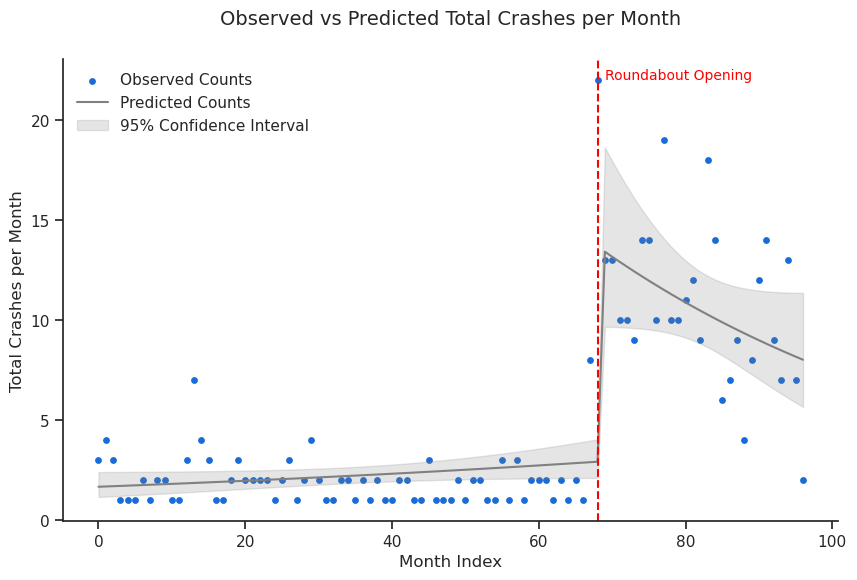

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(fig)
ax.scatter(monthly_counts["Month_Index"], monthly_counts["Total_Crashes_per_Month"], color="#196bd6", s=15, label='Observed Counts')
ax.plot(monthly_counts["Month_Index"], pred_crash.summary_frame()["predicted"], color='grey', label='Predicted Counts')
ax.fill_between(
    monthly_counts["Month_Index"],
    pred_crash.summary_frame()["ci_lower"],
    pred_crash.summary_frame()["ci_upper"],
    color='grey',
    alpha=0.2,
    label='95% Confidence Interval'
)
ax.axvline(68, color='red', linestyle='--')
ax.text(68 + 1, ax.get_ylim()[1]*0.98, 'Roundabout Opening', color='red', va='top', ha='left', fontsize=10)
ax.set_xlabel('Month Index')
ax.set_ylabel('Total Crashes per Month')
ax.set_title('Observed vs Predicted Total Crashes per Month', fontsize=14, pad=25)
ax.legend( loc='upper left', frameon=False)
plt.show()

### Odds of Injury Model Regression

'endog' dependent variable defined of counts of crashes for each quarter with injuries and without

In [54]:
quarterly_counts = quarterly_counts.with_columns(
    (pl.col("Total_Crashes_per_quarter") - pl.col("Injury_Count_per_quarter")).alias("Non_Injury_Count_per_quarter")
)

endog = quarterly_counts.select([
    pl.col("Injury_Count_per_quarter"),
    pl.col("Non_Injury_Count_per_quarter")
])
endog

Injury_Count_per_quarter,Non_Injury_Count_per_quarter
i32,i64
2,1
2,6
1,1
4,1
1,3
…,…
8,24
7,31
2,18


Constants for the model defined

In [55]:
constants = quarterly_counts.select([
        pl.col("Roundabout_Time"),
        pl.col("Quarter_Index"),
        pl.col("Roundabout_Post_Time")
    ])

Binomial generalized linear model fit to quarterly data

In [56]:
injury_model = sm.GLM(
    endog=endog.to_numpy(),
    exog=sm.add_constant(constants.to_numpy()),
    family=sm.families.Binomial()
).fit()

From the model summary below, the model does not confidently predict either a stepwise change in injury odds after the roundabout or a trend in injury odds following the roundabout completion. The model does predict an overall decreasing trend in the odds of injury, but this may be inaccurate since this study does not include confounding effects of traffic density.

In [57]:
injury_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                   41
Model:                            GLM   Df Residuals:                       37
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.329
Date:                Mon, 08 Dec 2025   Deviance:                       39.351
Time:                        20:18:35   Pearson chi2:                     38.8
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1842      0.303     -0.609      0.543      -0.777       0.409
x1            -0.5485      2.970     -0.185      0.853      -6.369       5.272
x2            -0.0562      0.016     -3.484      0.000      -0.088      -0.025
x3             0.0253      0.083      0.305      0.760      -0.137       0.188
==============================================================================
"""

Model predictions calculated on dataset for graphing

In [58]:
pred_injury = injury_model.get_prediction(sm.add_constant(constants.to_numpy()))

#### Plot of Actual vs Modeled Injury Proportion/Probability by Quarter

The variablity in the data made it difficult to confidently predict any trends but the model shows a very slight increase in probability of an injury and very little trend in probability over time after the roundabout completion.

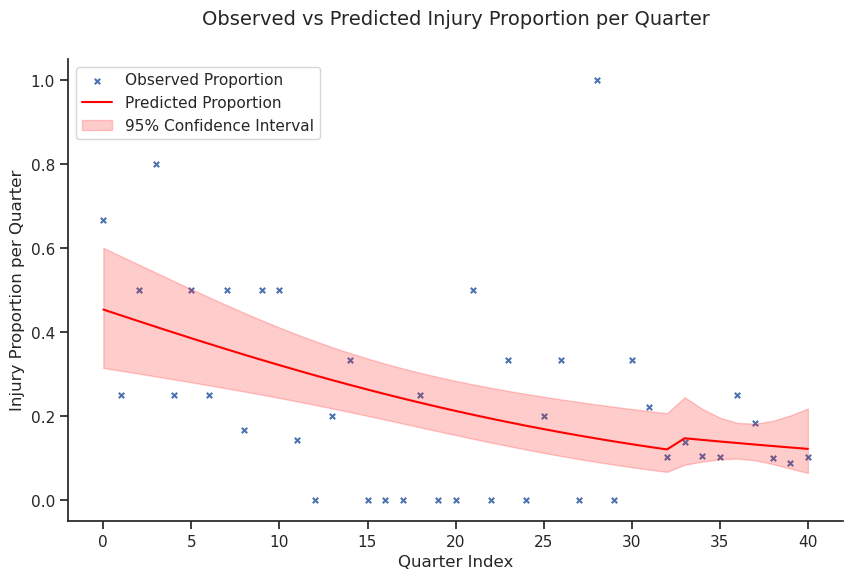

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(fig)
ax.scatter(quarterly_counts["Quarter_Index"], quarterly_counts["Injury_Count_per_quarter"] / quarterly_counts["Total_Crashes_per_quarter"], marker='x', s=15, label='Observed Proportion')
ax.plot(quarterly_counts["Quarter_Index"], pred_injury.summary_frame()["mean"], color='red', label='Predicted Proportion')
ax.fill_between(
    quarterly_counts["Quarter_Index"],
    pred_injury.summary_frame()["mean_ci_lower"],
    pred_injury.summary_frame()["mean_ci_upper"],
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)
ax.set_xlabel('Quarter Index')
ax.set_ylabel('Injury Proportion per Quarter')
ax.set_title('Observed vs Predicted Injury Proportion per Quarter', fontsize=14, pad=25)
ax.legend()
plt.show()

## Conclusion

### Key Takeaways

1. Accident frequency did dramatically increase right after the roundabout was completed.
2. Accident frequency though has been decreasing ~3% per month or ~32% per year following the roundabout introduction.
3. No trends or jumps in crash severity/injury probability were able to be determined.

### Limitations

This study did not account for confounding effects from traffic density changes. It is possible Covid had a slight effect on accident frequency and severity in the years prior to the roundabout. It is also possible that the improvement in accident frequency could be due to drivers actively avoiding the roundabouts. 

### Implications

Despite the limitations of this study, the jump in accidents following the roundabout is undeniable. As WSDOT impliments more roundabouts in the state, it is important to highlight the anomaly of the Lake Steven's roundabouts so that future projects can avoid the same unexpected opposite effects of introducing roundabouts. It is also important though to show the steady improvement in accidents since the initial introduction. News organizations and online message boards flocked to discussing the inital outcomes of the roundabouts, but it is also important for residents of Lake Stevens to be aware of the current safety of the roundabouts.

## References


[1] https://www.heraldnet.com/news/blessing-or-baffling-lake-stevens-new-roundabout-maze-divides-drivers/

[2] https://www.king5.com/article/traffic/send-shante-roundabouts-lake-stevens/281-c5adebdd-bcc3-492a-92bd-5bf5c3d7ecb2 

[3] Hu, Wen, and Jessica B. Cicchino. “Long-Term Crash Trends at Single- and Double-Lane Roundabouts in Washington State.” Journal of Safety Research, vol. 70, 2019, pp. 207–12, https://doi.org/10.1016/j.jsr.2019.07.005.

[4] https://www.iihs.org/research-areas/roundabouts#safety-benefits 

[5] Eisenman, S., Josselyn, J., List, G., Persaud, B., Lyon, C., Robinson, B., Blogg, M., Waltman, E., & Troutbeck, R. (2004). FINAL REPORT OPERATIONAL AND SAFETY PERFORMANCE OF MODERN ROUNDABOUTS AND OTHER INTERSECTION TYPES.

## Appendix

### Test for whether monthly crash counts can be modeled by a poisson distribution

mean:  4.628865979381444
variance:  23.22308428100754


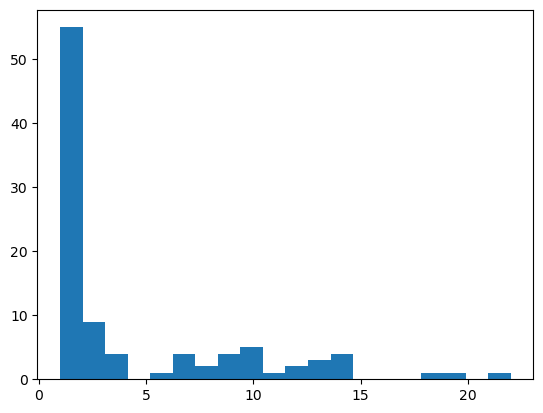

In [ ]:
coll_subset_per_crash_month = (
    coll_per_crash
    .with_columns(pl.col("Collision_Date").dt.truncate("1mo").alias("Crash_Month"))
    .group_by("Crash_Month")
    .agg(pl.len().alias("Num_Collisions"))
    )
print("mean: ", np.mean(coll_subset_per_crash_month["Num_Collisions"].to_numpy()))
print("variance: ", np.var(coll_subset_per_crash_month["Num_Collisions"].to_numpy()))

plt.hist(coll_subset_per_crash_month["Num_Collisions"].to_numpy(), bins=20);

mean:  10.5
variance:  13.892857142857142


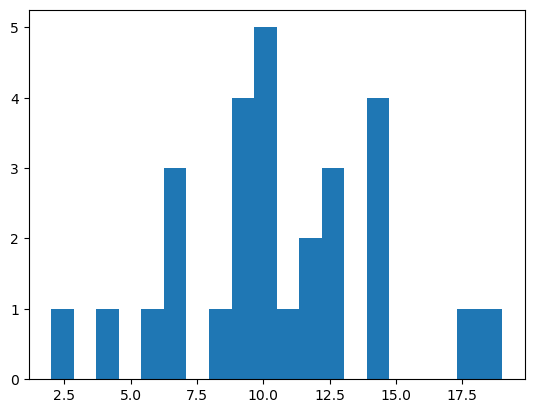

In [ ]:
after_roundabout = (
    coll_subset_per_crash_month
    .filter(pl.col("Crash_Month") >= datetime(2023,7,7))
    .sort("Crash_Month"))

print("mean: ", np.mean(after_roundabout["Num_Collisions"].to_numpy()))
print("variance: ", np.var(after_roundabout["Num_Collisions"].to_numpy()))

plt.hist(after_roundabout["Num_Collisions"].to_numpy(), bins=20);

In [43]:
pred_injury = injury_model.get_prediction(sm.add_constant(constants.to_numpy()))

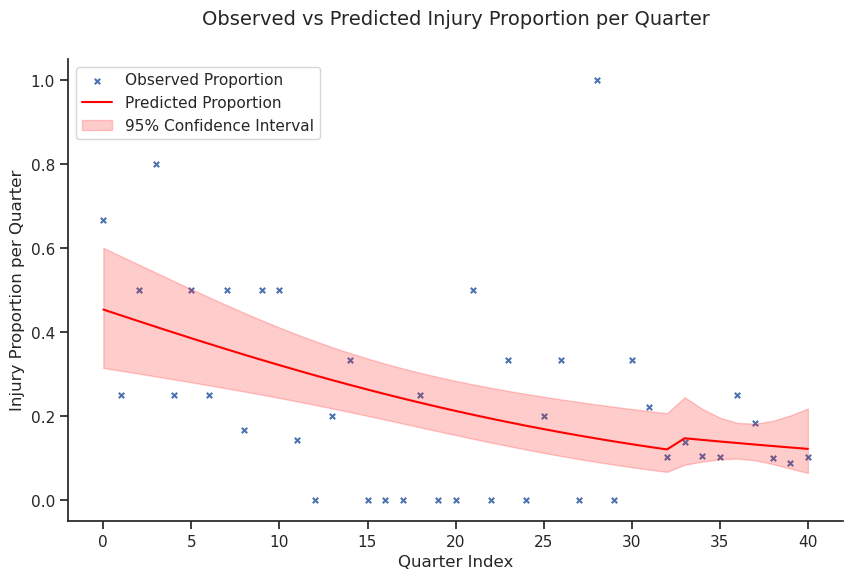

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(fig)
ax.scatter(quarterly_counts["Quarter_Index"], quarterly_counts["Injury_Count_per_quarter"] / quarterly_counts["Total_Crashes_per_quarter"], marker='x', s=15, label='Observed Proportion')
ax.plot(quarterly_counts["Quarter_Index"], pred_injury.summary_frame()["mean"], color='red', label='Predicted Proportion')
ax.fill_between(
    quarterly_counts["Quarter_Index"],
    pred_injury.summary_frame()["mean_ci_lower"],
    pred_injury.summary_frame()["mean_ci_upper"],
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)
ax.set_xlabel('Quarter Index')
ax.set_ylabel('Injury Proportion per Quarter')
ax.set_title('Observed vs Predicted Injury Proportion per Quarter', fontsize=14, pad=25)
ax.legend()
plt.show()